<a href="https://colab.research.google.com/github/Cryslender/OIBSIP/blob/main/Retail_Sales_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

# Data Loading

In [ ]:
# load the dataset
sales_data = pd.read_csv("retail_sales_dataset.csv")

In [ ]:
sales_data.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


# Data Cleaning

In [ ]:
# Calculate total sales
total_sales = sales_data['Total Amount'].sum()

print("Total sales: R{:.2f}".format(total_sales))

Total sales: R456000.00


In [ ]:
# check the null values
sales_data.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [ ]:
# check duplicates
sales_data.duplicated().sum()

0

In [ ]:
#check the info of the data
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [ ]:
# Convert 'Date' column to datetime format and set transection ID as index
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
sales_data.set_index('Date', inplace=True)

In [ ]:
# Format 'Price per Unit' column as float
sales_data['Price per Unit'] = sales_data['Price per Unit'].astype(float)

In [ ]:
# Format 'Total Amount' column as float
sales_data['Total Amount'] = sales_data['Total Amount'].astype(float)

In [ ]:
#check the info of the data after converting data types
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    1000 non-null   int64  
 1   Customer ID       1000 non-null   object 
 2   Gender            1000 non-null   object 
 3   Age               1000 non-null   int64  
 4   Product Category  1000 non-null   object 
 5   Quantity          1000 non-null   int64  
 6   Price per Unit    1000 non-null   float64
 7   Total Amount      1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 70.3+ KB


In [ ]:
# Sorted Date in ascending order
sales_data = sales_data.sort_values(by='Date', ascending=True, na_position='first')

In [ ]:
# check if the column data types has been changed
sales_data.head(10)

,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
Date,,,,,,,,
2023-01-01,522,CUST522,Male,46,Beauty,3,500.0,1500.0
2023-01-01,180,CUST180,Male,41,Clothing,3,300.0,900.0
2023-01-01,559,CUST559,Female,40,Clothing,4,300.0,1200.0
2023-01-02,303,CUST303,Male,19,Electronics,3,30.0,90.0
2023-01-02,979,CUST979,Female,19,Beauty,1,25.0,25.0
2023-01-02,163,CUST163,Female,64,Clothing,3,50.0,150.0
2023-01-02,421,CUST421,Female,37,Clothing,3,500.0,1500.0
2023-01-03,610,CUST610,Female,26,Beauty,2,300.0,600.0
2023-01-04,683,CUST683,Male,38,Beauty,2,500.0,1000.0


In [ ]:
# stats for numeric columns
sales_data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
# Calculate the mode for each column
mode_values = sales_data.mode()

print("Mode for each column:")
mode_values

Mode for each column:


,Transaction ID,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,CUST001,Female,43.0,Clothing,4.0,50.0,50.0
1,2,CUST002,NaN,64.0,NaN,NaN,NaN,NaN
2,3,CUST003,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CUST004,NaN,NaN,NaN,NaN,NaN,NaN
4,5,CUST005,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,996,CUST995,NaN,NaN,NaN,NaN,NaN,NaN
996,997,CUST996,NaN,NaN,NaN,NaN,NaN,NaN
997,998,CUST997,NaN,NaN,NaN,NaN,NaN,NaN
998,999,CUST998,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Analyze customer demographics
customer_demographics = sales_data.groupby('Gender')['Age'].describe()

# Analyze purchasing behavior by product category
purchasing_behavior = sales_data.groupby('Product Category')['Total Amount'].sum()

In [ ]:
customer_demographics

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,510.0,41.356863,13.568067,18.0,29.0,42.0,52.75,64.0
Male,490.0,41.428571,13.812208,18.0,30.0,42.0,54.00,64.0


In [ ]:
# Group data by Product Category and count unique Customer IDs
customer_count_per_category = sales_data.groupby('Product Category')['Customer ID'].nunique()

# Explorative Data Analytics

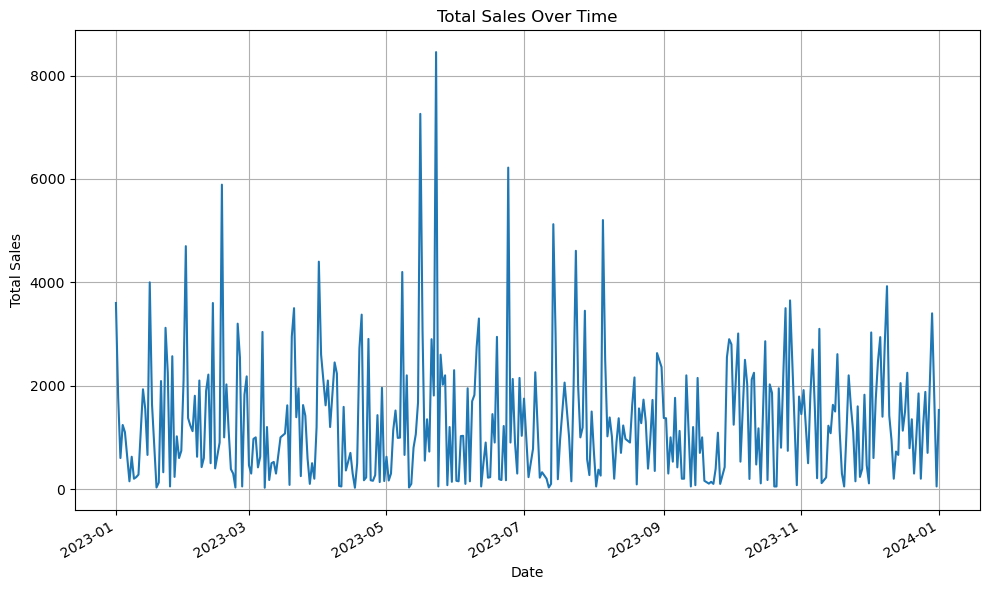

In [ ]:
# Total sales over time
plt.figure(figsize=(10, 6))
sales_data.groupby('Date')['Total Amount'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

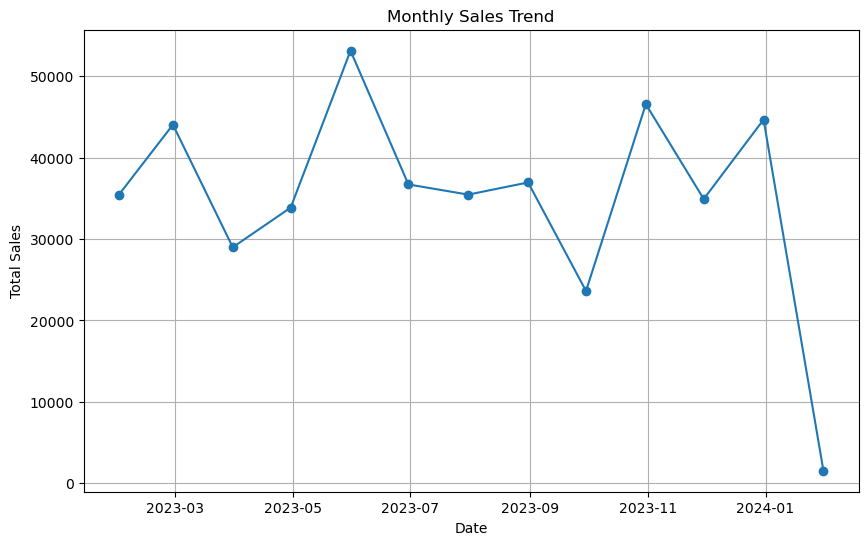

In [ ]:
# Montly Sales Trend
monthly_sales = sales_data.resample('M').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


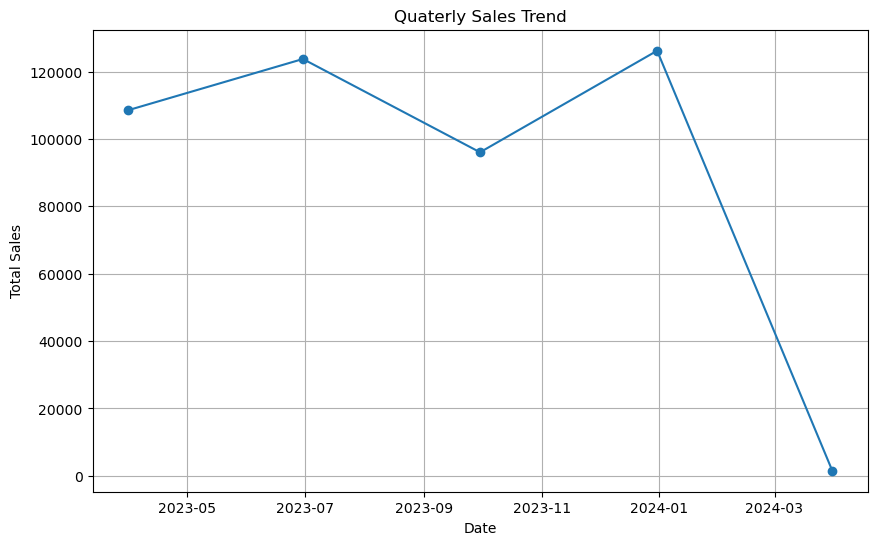

In [ ]:
# Quaterly Sales Trend
monthly_sales = sales_data.resample('Q').sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total Amount'], marker='o', linestyle='-')
plt.title('Quaterly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

Gender    Female  Male
Quantity              
1            125   128
2            120   123
3            127   114
4            138   125


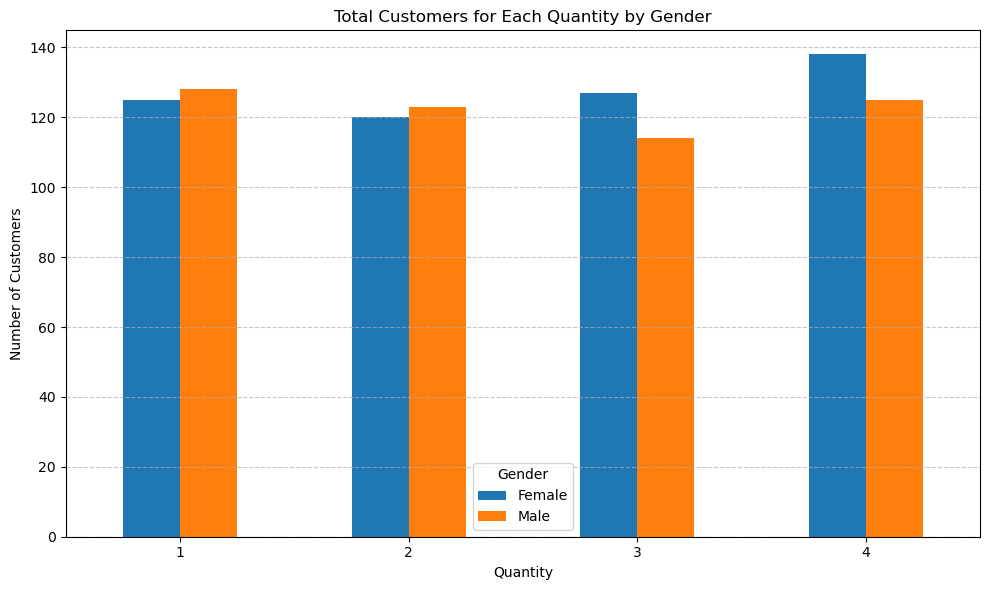

In [ ]:
# Group data by Quantity and Gender, and count unique Customer IDs
customer_count_per_quantity_gender = sales_data.groupby(['Quantity', 'Gender'])['Customer ID'].nunique()

# Convert the resulting Series to a DataFrame for easier plotting
customer_count_per_quantity_gender = customer_count_per_quantity_gender.reset_index()

# Create a pivot table for better visualization
pivot_table_quantity_gender = customer_count_per_quantity_gender.pivot(index='Quantity', columns='Gender', values='Customer ID')

print(pivot_table_quantity_gender)

# Plot the pivot table
pivot_table_quantity_gender.plot(kind='bar', figsize=(10, 6))
plt.title('Total Customers for Each Quantity by Gender')
plt.xlabel('Quantity')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Product Category  Beauty  Clothing  Electronics
Quantity                                       
1                     74        88           91
2                     75        80           88
3                     85        86           70
4                     73        97           93


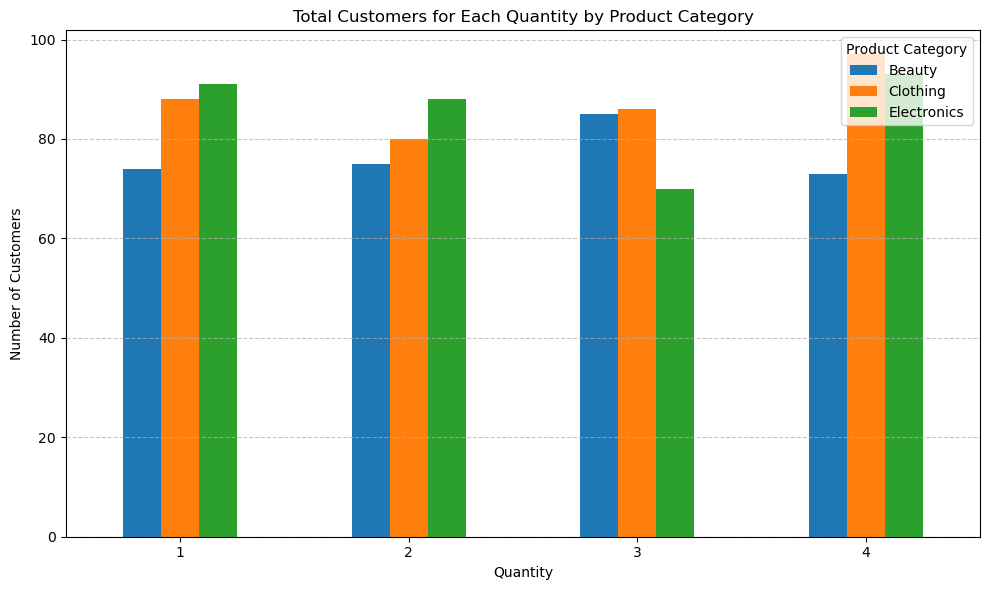

In [ ]:
# Group data by Product Category and Quantity, and count unique Customer IDs
customer_count_per_category_quantity = sales_data.groupby(['Product Category', 'Quantity'])['Customer ID'].nunique()

# Convert the resulting Series to a DataFrame for easier plotting
customer_count_per_category_quantity = customer_count_per_category_quantity.reset_index()

# Create a pivot table for better visualization
pivot_table_category_quantity = customer_count_per_category_quantity.pivot(index='Quantity', columns='Product Category', values='Customer ID')

print(pivot_table_category_quantity)

# Plot the pivot table
pivot_table_category_quantity.plot(kind='bar', figsize=(10, 6))
plt.title('Total Customers for Each Quantity by Product Category')
plt.xlabel('Quantity')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


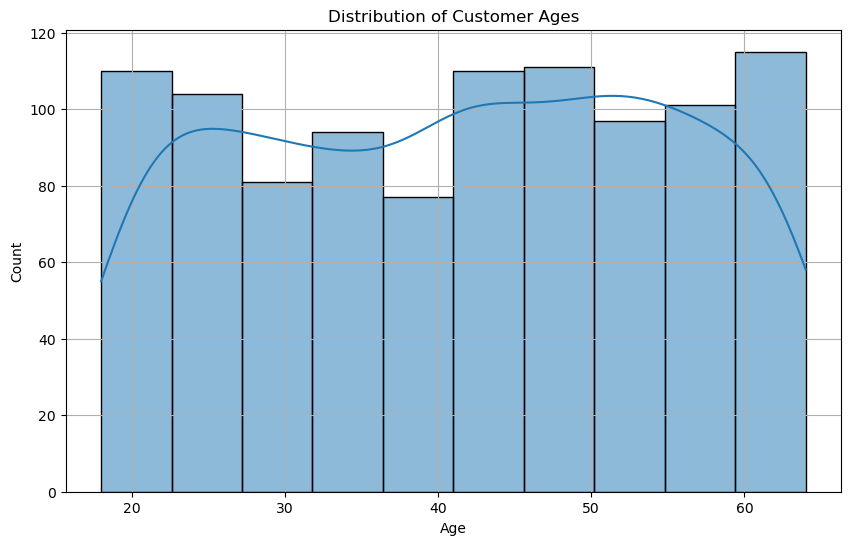

In [ ]:
# Customer Analysis
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Age'], bins=10, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

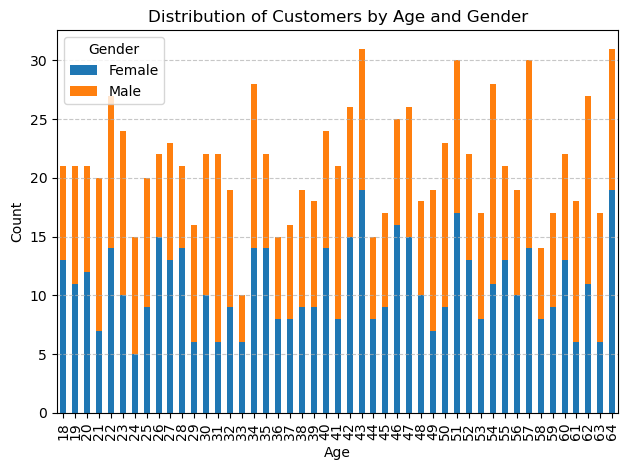

In [ ]:
# Distribution of customers by age and gender
plt.figure(figsize=(10, 6))
sales_data.groupby(['Age', 'Gender']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Distribution of Customers by Age and Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Product Category
Beauty         307
Clothing       351
Electronics    342
Name: Customer ID, dtype: int64


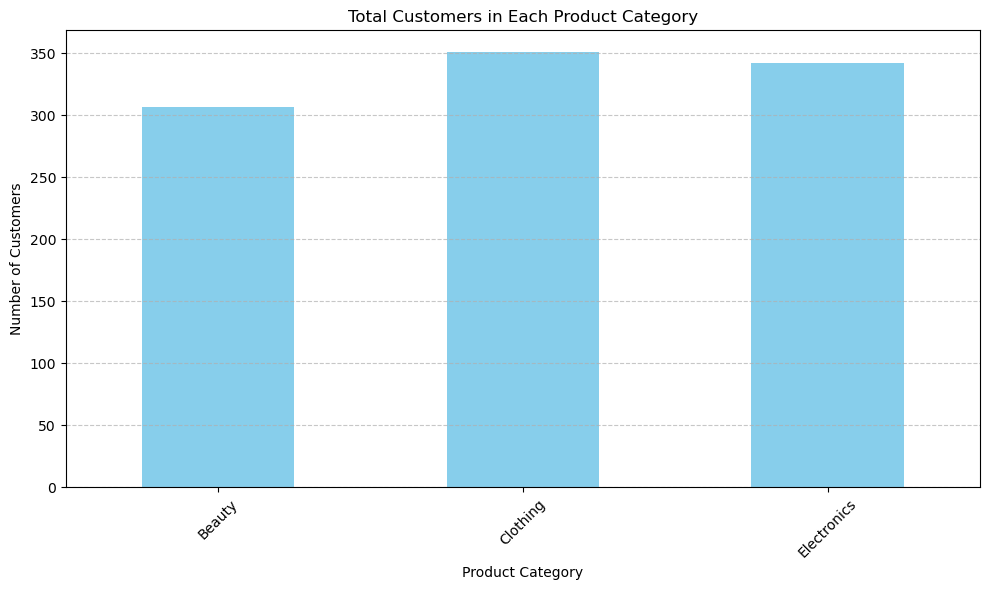

In [ ]:
print(customer_count_per_category)

# Distribution of product categories
plt.figure(figsize=(10, 6))
customer_count_per_category.plot(kind='bar', color='skyblue')
plt.title('Total Customers in Each Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Gender            Female  Male
Product Category              
Beauty               166   141
Clothing             174   177
Electronics          170   172


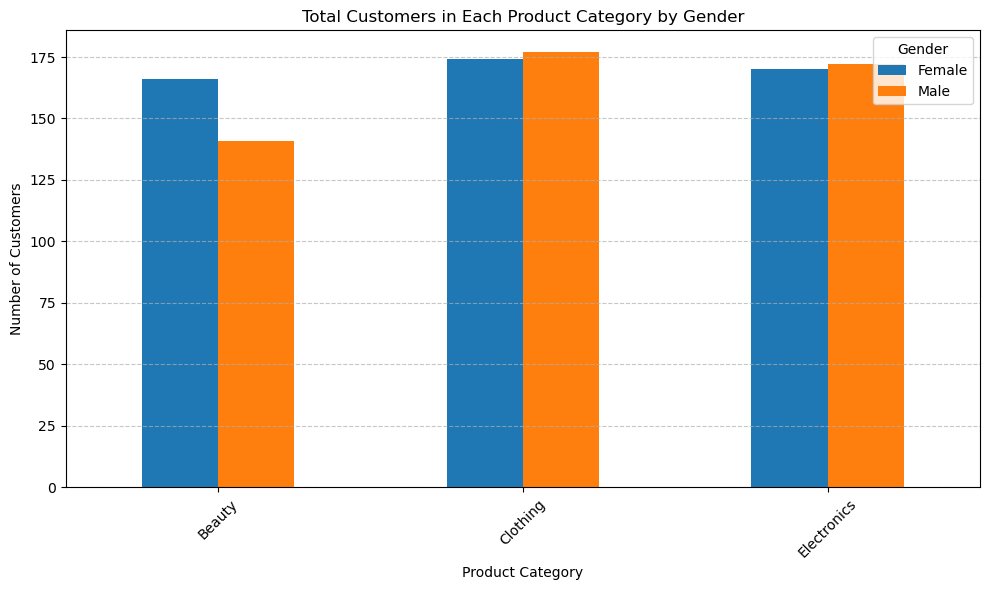

In [ ]:
# Group data by Product Category and Gender, and count unique Customer IDs
customer_count_per_category_gender = sales_data.groupby(['Product Category', 'Gender'])['Customer ID'].nunique()

# Convert the resulting Series to a DataFrame for easier plotting
customer_count_per_category_gender = customer_count_per_category_gender.reset_index()

# Create a pivot table for better visualization
pivot_table = customer_count_per_category_gender.pivot(index='Product Category', columns='Gender', values='Customer ID')

print(pivot_table)

# Plot the pivot table
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Total Customers in Each Product Category by Gender')
plt.xlabel('Product Category')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

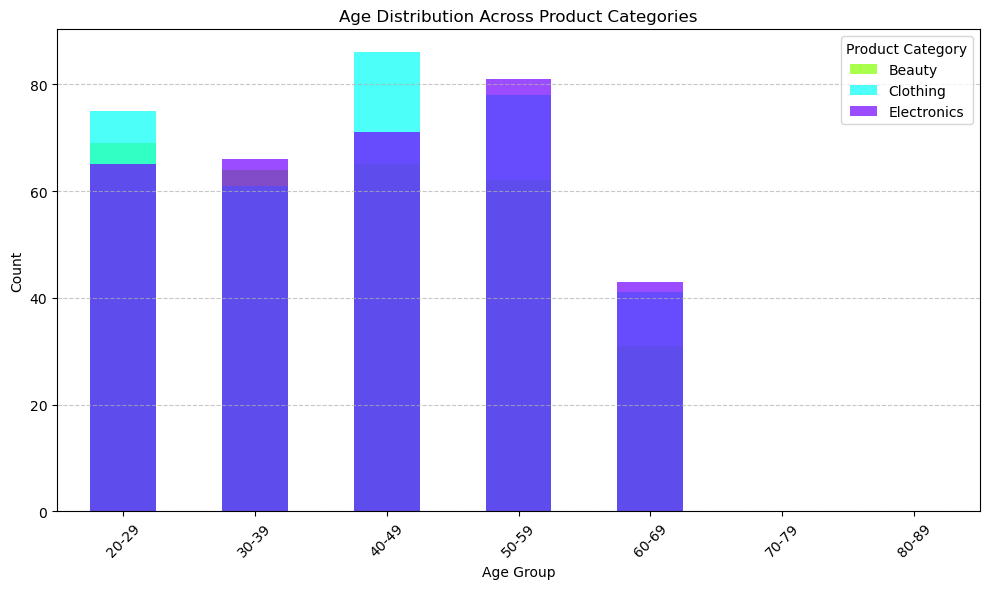

In [ ]:
# Define age group boundaries and labels
bins = [20, 30, 40, 50, 60, 70, 80, 90]
labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
sales_data['Age Group'] = pd.cut(sales_data['Age'], bins=bins, labels=labels, right=False)

# Set color palette for product categories
palette = sns.color_palette("hsv", len(sales_data['Product Category'].unique()))

# Plot the distribution of age groups across product categories
plt.figure(figsize=(10, 6))
for i, (category, group) in enumerate(sales_data.groupby('Product Category')):
    group['Age Group'].value_counts().sort_index().plot(kind='bar', alpha=0.7, label=category, color=palette[i])

plt.title('Age Distribution Across Product Categories')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Product Category
Beauty         143515.0
Clothing       155580.0
Electronics    156905.0
Name: Total Amount, dtype: float64


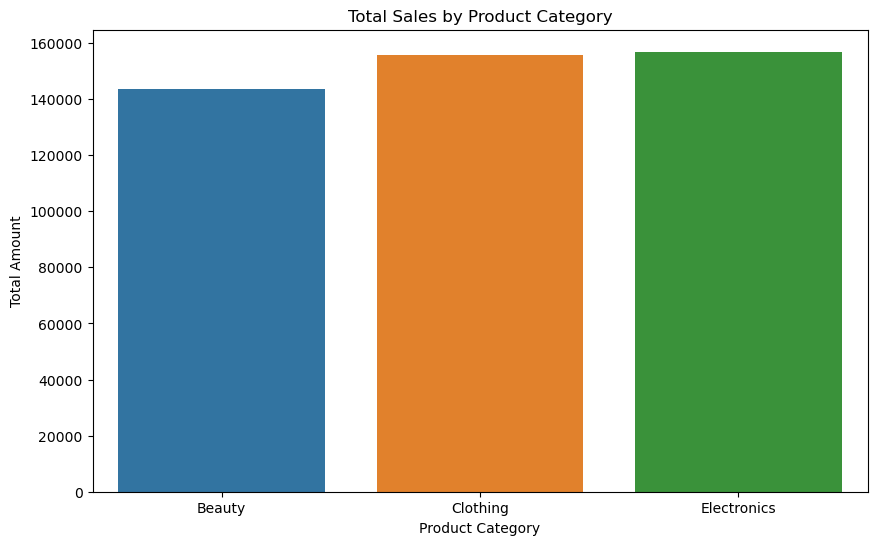

In [ ]:
print(purchasing_behavior)

# Purchasing behavior
plt.figure(figsize=(10, 6))
sns.barplot(x=purchasing_behavior.index, y=purchasing_behavior.values)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
#initialize profile variable to use it to find the analytics about the data
profile= ProfileReport(sales_data,title="Retail Sales Dataset Report", explorative=True)

#Output the report about the data
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

            level_0 level_1  Female  Male
0  Product Category   count     510   490


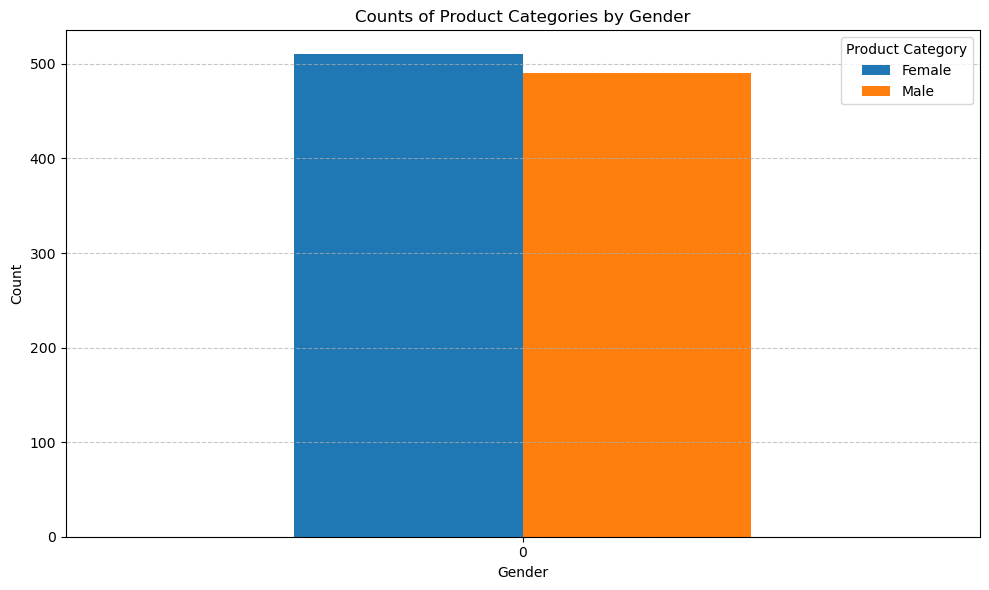

In [ ]:
import mitosheet
from mitosheet.public.v3 import *; register_analysis("id-mcxaediouq");

# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_2
tmp_df = sales_data[['Product Category', 'Gender']].copy()
pivot_table = tmp_df.pivot_table(
    columns=['Gender'],
    values=['Product Category'],
    aggfunc={'Product Category': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_2 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_2)

# Plot the pivoted dataset
retail_sales_dataset_pivot_2.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Product Categories by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

    level_0 level_1  Female  Male
0  Quantity     sum    1298  1216


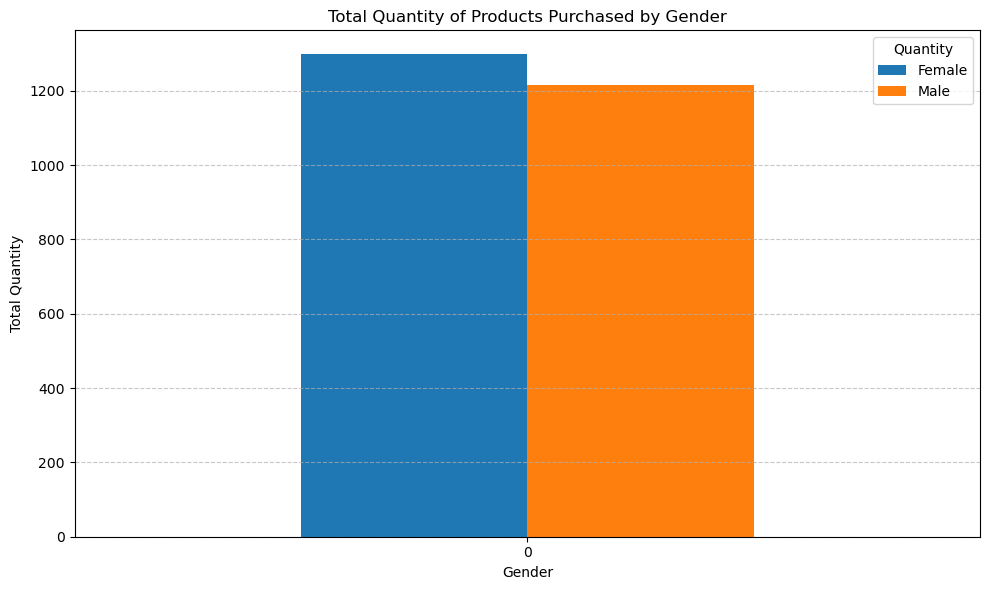

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_3
tmp_df = sales_data[['Quantity', 'Gender']].copy()
pivot_table = tmp_df.pivot_table(
    columns=['Gender'],
    values=['Quantity'],
    aggfunc={'Quantity': ['sum']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_3 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_3)

# Plot the pivoted dataset
retail_sales_dataset_pivot_3.plot(kind='bar', figsize=(10, 6))
plt.title('Total Quantity of Products Purchased by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Quantity')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  level_0 level_1    1    2    3    4
0     Age   count  253  243  241  263


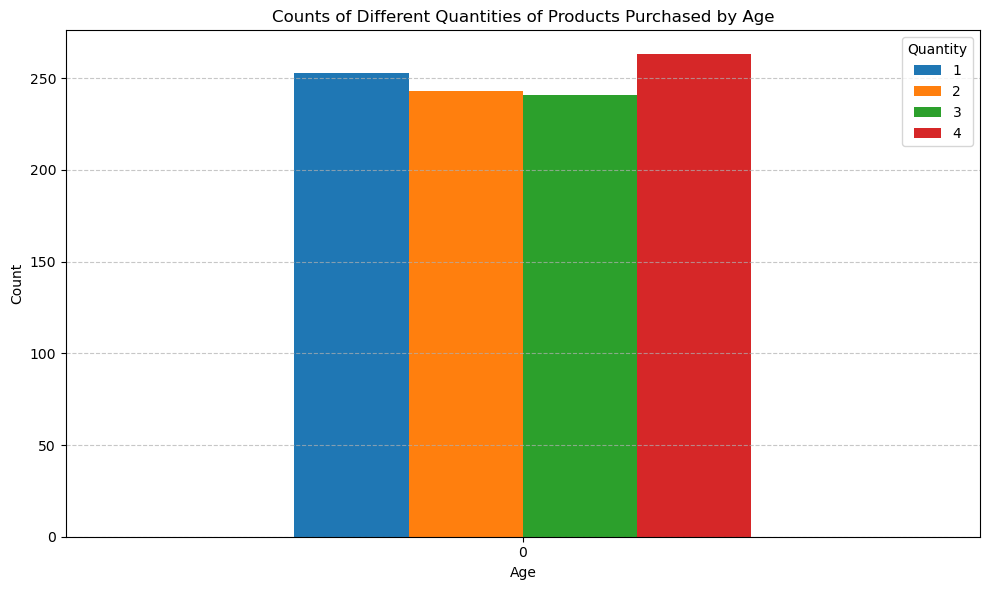

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_4
tmp_df = sales_data[['Quantity', 'Age']].copy()
pivot_table = tmp_df.pivot_table(
    columns=['Quantity'],
    values=['Age'],
    aggfunc={'Age': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_4 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_4)

# Plot the pivoted dataset
retail_sales_dataset_pivot_4.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Different Quantities of Products Purchased by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Quantity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

   Gender  Price per Unit count 1  Price per Unit count 2  \
0  Female                     125                     120   
1    Male                     128                     123   

   Price per Unit count 3  Price per Unit count 4  
0                     127                     138  
1                     114                     125  


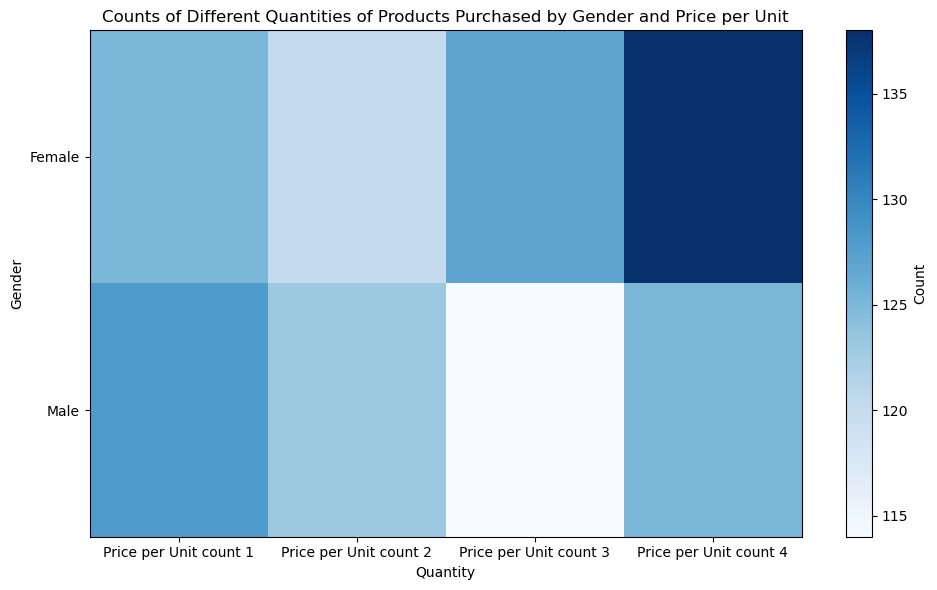

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_5
tmp_df = sales_data[['Quantity', 'Price per Unit', 'Gender']].copy()
pivot_table = tmp_df.pivot_table(
    index=['Gender'],
    columns=['Quantity'],
    values=['Price per Unit'],
    aggfunc={'Price per Unit': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_5 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_5)
# Plot the pivoted dataset as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(retail_sales_dataset_pivot_5.iloc[:, 1:], cmap='Blues', aspect='auto')
plt.colorbar(label='Count')
plt.title('Counts of Different Quantities of Products Purchased by Gender and Price per Unit')
plt.xlabel('Quantity')
plt.ylabel('Gender')
plt.xticks(ticks=range(len(retail_sales_dataset_pivot_5.columns[1:])), labels=retail_sales_dataset_pivot_5.columns[1:])
plt.yticks(ticks=range(len(retail_sales_dataset_pivot_5)), labels=retail_sales_dataset_pivot_5['Gender'])
plt.tight_layout()
plt.show()

   Gender  Total Amount count Beauty  Total Amount count Clothing  \
0  Female                        166                          174   
1    Male                        141                          177   

   Total Amount count Electronics  
0                             170  
1                             172  


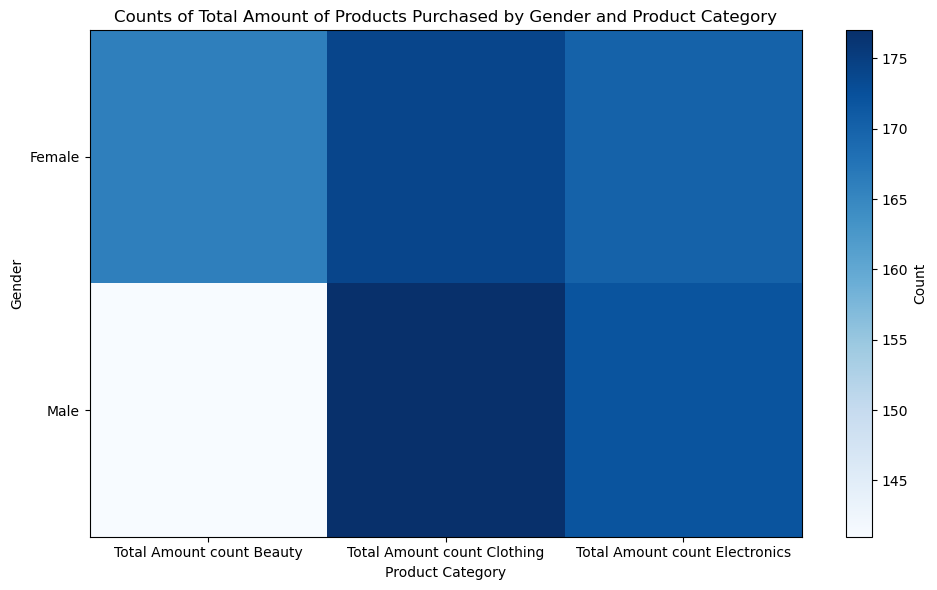

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_6
tmp_df = sales_data[['Product Category', 'Total Amount', 'Gender']].copy()
pivot_table = tmp_df.pivot_table(
    index=['Gender'],
    columns=['Product Category'],
    values=['Total Amount'],
    aggfunc={'Total Amount': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_6 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_6)
# Plot the pivoted dataset as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(retail_sales_dataset_pivot_6.iloc[:, 1:], cmap='Blues', aspect='auto')
plt.colorbar(label='Count')
plt.title('Counts of Total Amount of Products Purchased by Gender and Product Category')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.xticks(ticks=range(len(retail_sales_dataset_pivot_6.columns[1:])), labels=retail_sales_dataset_pivot_6.columns[1:])
plt.yticks(ticks=range(len(retail_sales_dataset_pivot_6)), labels=retail_sales_dataset_pivot_6['Gender'])
plt.tight_layout()
plt.show()

            level_0 level_1    1    2    3    4
0  Product Category   count  253  243  241  263


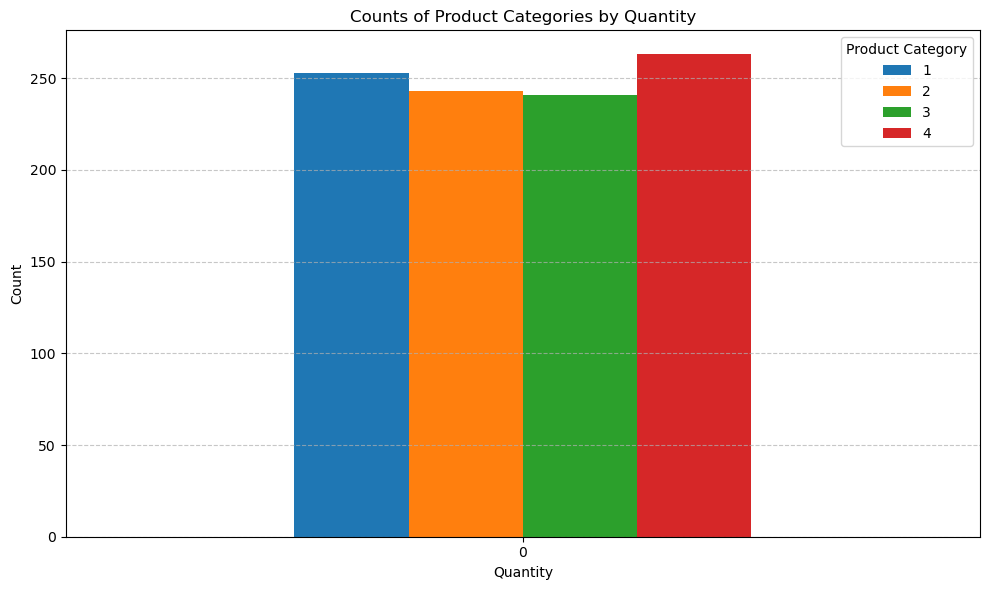

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_7
tmp_df = sales_data[['Quantity', 'Product Category']].copy()
pivot_table = tmp_df.pivot_table(
    columns=['Quantity'],
    values=['Product Category'],
    aggfunc={'Product Category': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_7 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_7)

# Plot the pivoted dataset
retail_sales_dataset_pivot_7.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Product Categories by Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Reset x-axis labels rotation
plt.legend(title='Product Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

  Product Category  Total Amount count Female  Total Amount count Male
0           Beauty                        166                      141
1         Clothing                        174                      177
2      Electronics                        170                      172


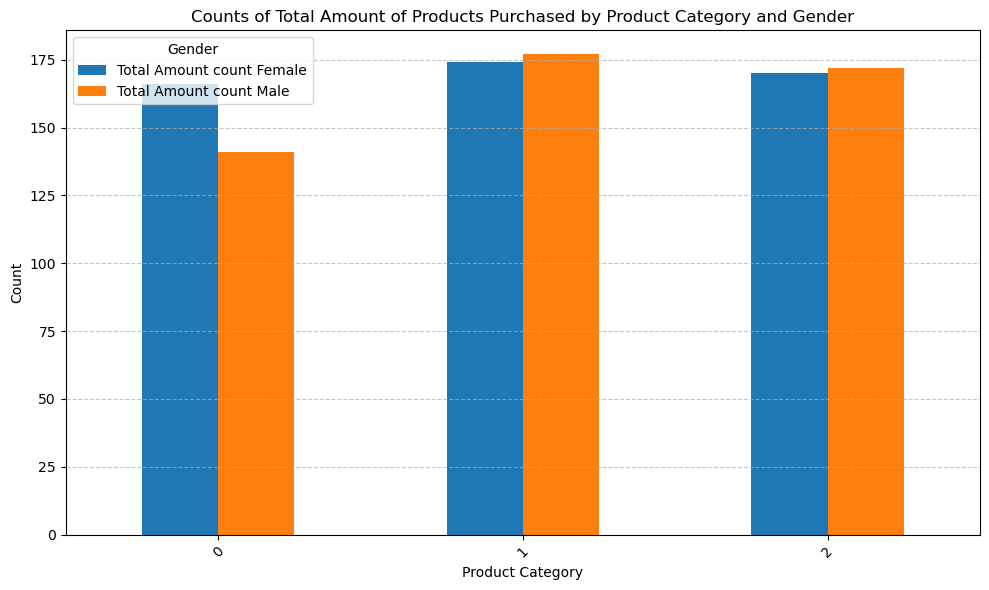

In [ ]:
# Pivoted retail_sales_dataset into retail_sales_dataset_pivot_8
tmp_df = sales_data[['Product Category', 'Total Amount', 'Gender']].copy()
pivot_table = tmp_df.pivot_table(
    index=['Product Category'],
    columns=['Gender'],
    values=['Total Amount'],
    aggfunc={'Total Amount': ['count']}
)
pivot_table.set_axis([flatten_column_header(col) for col in pivot_table.keys()], axis=1, inplace=True)
retail_sales_dataset_pivot_8 = pivot_table.reset_index()

print(retail_sales_dataset_pivot_8)

# Plot the pivoted dataset
retail_sales_dataset_pivot_8.plot(kind='bar', figsize=(10, 6))
plt.title('Counts of Total Amount of Products Purchased by Product Category and Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Recommendations

- **Target Marketing**: Focus marketing efforts on the most profitable product categories, such as Clothing and Electronics. Target marketing efforts towards younger age groups, as they seem to make up a larger portion of customers.
- **Customer Segmentation**: Segment customers based on demographics (gender, age) for targeted promotions and personalized experiences. Consider expanding product offerings in the Clothing category, which appears to be the most popular.
- **Promotions and Discounts**: Offer promotions or discounts on less popular product categories (e.g., Beauty) to increase sales.
- **Inventory Management**: Optimize inventory for high-demand products to avoid stockouts and maximize revenue.
- **Seasonal Trends**: Analyze seasonal trends to adjust marketing strategies and inventory levels accordingly.
